In [1]:
%matplotlib inline

import sys
import os
sys.path.append("../../..")
import inspect

import numpy as np
import scipy as sp
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure, img_as_float, morphology, color
from skimage.measure import label
from PIL import Image

from osgeo import gdal
import osr
import my_packages.My_Geoprocess as mgp
from sklearn.cluster import KMeans
from matplotlib import cm

from scipy import stats


# 

In [28]:
ImagesFolder = '../../Images/Acolite/S2A_MSIL1C_20170929T231851_N0205_R001_T58KDE_20170929T231932/'
raster_wavelength = ['560']
raster_Name = [ 'Deglint/' + f + '.tif' for f in raster_wavelength]
bands_data = []

for f in range(len(raster_Name)):
    raster_dataset = gdal.Open(ImagesFolder+raster_Name[f], gdal.GA_ReadOnly)
    band = raster_dataset.GetRasterBand(1)

geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjection()

rows, cols = (raster_dataset.RasterYSize, raster_dataset.RasterXSize)

# WorkingIndex = np.full((10980, 10980), False)
# WorkingIndex[5000:,0:8500] = True


AttributeError: 'NoneType' object has no attribute 'GetRasterBand'

In [11]:
npzfile = np.load('../../CompressedData/XData.npz')
X = npzfile['VolumFreeR']
Blue, Green, Red = np.log(6000*X[:,:,1]), np.log(6000*X[:,:,2]), np.log(6000*X[:,:,3])
del X

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
r2, s, it = mgp.GetNeighboorRegress(Red, Green, (500,500), (5,5), verbose=True)

../../..\my_packages\My_Geoprocess.py:851: RuntimeWarning: invalid value encountered in subtract
  y_norm = y - y_mean


Block: 1, at location : [2:498] x [2:498]
Block: 2, at location : [2:498] x [498:994]
Block: 3, at location : [2:498] x [994:1490]
Block: 4, at location : [2:498] x [1490:-2]
Block: 5, at location : [498:994] x [2:498]


../../..\my_packages\My_Geoprocess.py:849: RuntimeWarning: invalid value encountered in subtract
  x_norm = x - x_mean


Block: 6, at location : [498:994] x [498:994]
Block: 7, at location : [498:994] x [994:1490]
Block: 8, at location : [498:994] x [1490:-2]
Block: 9, at location : [994:-2] x [2:498]
Block: 10, at location : [994:-2] x [498:994]
Block: 11, at location : [994:-2] x [994:1490]
Block: 12, at location : [994:-2] x [1490:-2]


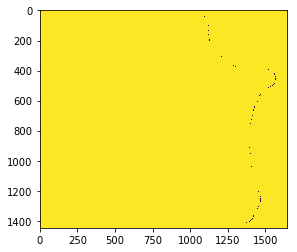

In [13]:
ShapeFolder = '../../Shapes/'
Lagoon = 'Mask/Lagoon.tif'

ClassifyIndex = gdal.Open(ImagesFolder + Lagoon, gdal.GA_ReadOnly)
ClassifyIndex = ClassifyIndex.GetRasterBand(1).ReadAsArray().astype(bool)

plt.imshow(ClassifyIndex)

In [14]:
assert ClassifyIndex.shape==r2.shape
r2[~ClassifyIndex] = np.nan
s[~ClassifyIndex] = np.nan
it[~ClassifyIndex] = np.nan

In [24]:
visuelIt = np.full(it.shape, np.nan)
visuelIt[:,:] = r2[:,:]
visuelIt[s<0] = np.nan

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


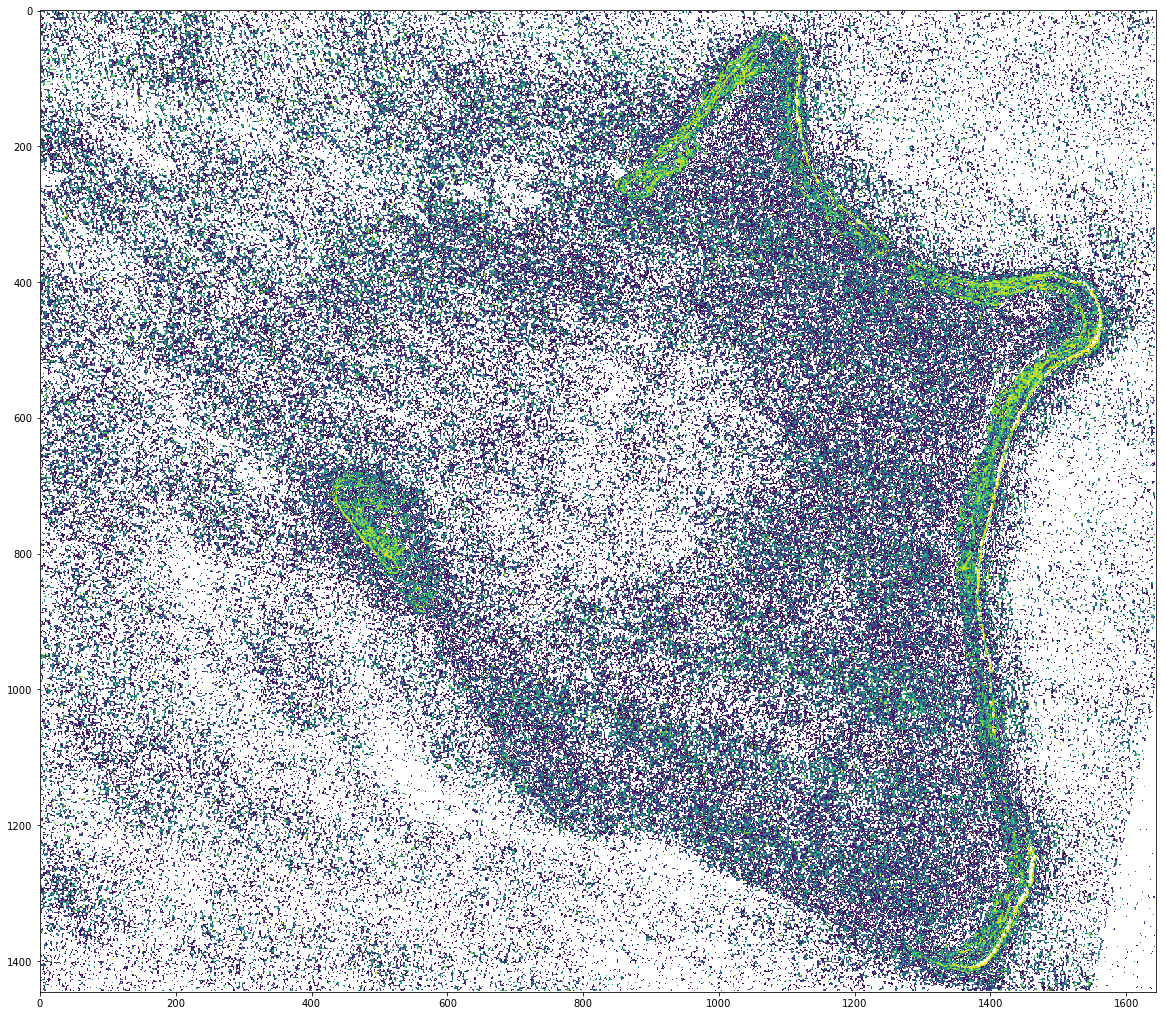

In [25]:
from matplotlib import colors
Meanit = np.nanmean(visuelIt)
Stdit = np.nanstd(visuelIt)

'''cmap = colors.ListedColormap(['blue', 'red'])
bounds=[0,0.96,3]
norm = colors.BoundaryNorm(bounds, cmap.N)'''
plt.figure(figsize=(20,20))
plt.imshow(visuelIt)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


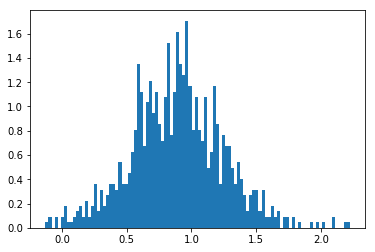

In [40]:
a,b,c = plt.hist(x=it[np.logical_and(np.logical_and(s>0.90,s<1 ),r2>0.99)],bins=100, normed=True)

In [ ]:
s.flatten()

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(s[3500:4500,3000:4500])

In [ ]:
np.nanmax(s)